In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


## Load and prepare the dataset


In [ ]:
file_path = "Business_Performance_09-01-2025_09-30-2025_10-09-2025_13-16-30.xlsx"
df = pd.read_excel(file_path)

df.head()

,Date Range,Revenue,Orders,Units Sold,Customer Visits,Conversion Rate
0,09/01/2025,32971.54,65,73,9151,0.005901
1,09/02/2025,30084.17,70,83,7275,0.006048
2,09/03/2025,3555.82,41,41,6250,0.003040
3,09/04/2025,7172.08,42,42,6124,0.003266
4,09/05/2025,4593.71,36,36,5709,0.003854


In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Convert date and clean numeric columns
df['Date Range'] = pd.to_datetime(df['Date Range'])
df['Revenue'] = df['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)
df['Conversion Rate'] = df['Conversion Rate'].replace(r'[\%]', '', regex=True).astype(float) / 100

# Use only Date and Units Sold
data = df[['Date Range', 'Units Sold']].set_index('Date Range')
data = data.asfreq('D')  # ensure daily frequency


In [ ]:
data.head()

,Units Sold
Date Range,
2025-09-01,73
2025-09-02,83
2025-09-03,41
2025-09-04,42
2025-09-05,36


## Visualize the time series

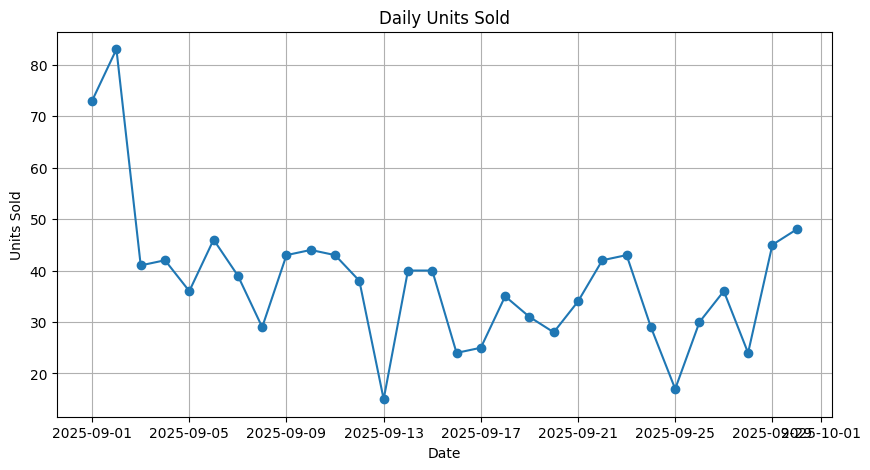

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Units Sold'], marker='o')
plt.title("Daily Units Sold")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()


## Train-test split
-  We’ll use the first 25 days for training and the last 5 for testing

In [ ]:
train = data.iloc[:25]
test = data.iloc[25:]


## Fit ARIMA model

In [ ]:
# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Summary
print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Units Sold   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -94.943
Date:                Wed, 15 Oct 2025   AIC                            195.886
Time:                        14:05:20   BIC                            199.420
Sample:                    09-01-2025   HQIC                           196.823
                         - 09-25-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3296      0.606      0.544      0.586      -0.858       1.517
ma.L1         -0.7127      0.498     -1.432      0.152      -1.688       0.262
sigma2       157.9199     37.820      4.176      0.0

## Forecast for test period

In [ ]:
# Forecast for next 5 days
forecast = model_fit.forecast(steps=len(test))

# Combine results
results_arima = test.copy()
results_arima['yhat'] = forecast.values

print(results_arima)


            Units Sold       yhat
Date Range                       
2025-09-26          30  23.783483
2025-09-27          36  26.019326
2025-09-28          24  26.756262
2025-09-29          45  26.999157
2025-09-30          48  27.079216


## Evaluate ARIMA performance

In [ ]:
# Actual and predicted
y_true = results_arima['Units Sold']
y_pred = results_arima['yhat']

# Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

print(f"ARIMA MAE: {mae:.2f}")
print(f"ARIMA RMSE: {rmse:.2f}")
print(f"ARIMA RMSLE: {rmsle:.4f}")


ARIMA MAE: 11.58
ARIMA RMSE: 13.47
ARIMA RMSLE: 0.3785


## Visualize Actual vs Predicted

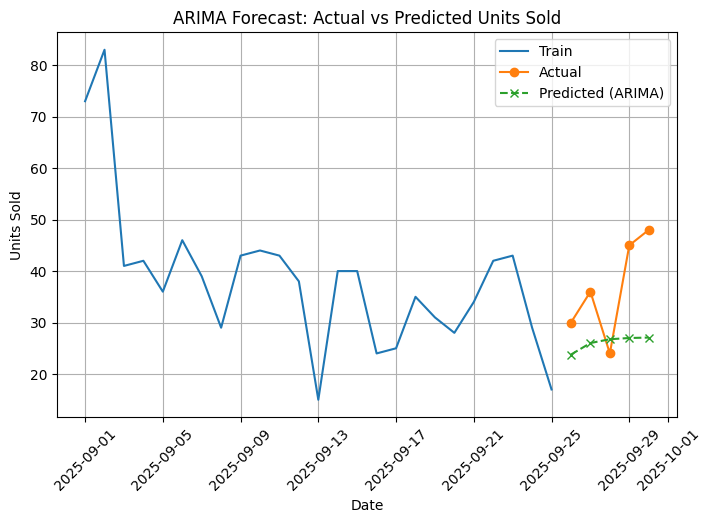

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train.index, train['Units Sold'], label='Train')
plt.plot(test.index, test['Units Sold'], marker='o', label='Actual')
plt.plot(test.index, results_arima['yhat'], marker='x', linestyle='--', label='Predicted (ARIMA)')
plt.title("ARIMA Forecast: Actual vs Predicted Units Sold")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### SARIMAX Model Implemetation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
file_path = "/content/Business_Performance_09-01-2025_09-30-2025_10-09-2025_13-16-30.xlsx"
df = pd.read_excel(file_path)

# Clean columns
df.columns = df.columns.str.strip()
df['Date Range'] = pd.to_datetime(df['Date Range'])
df['Revenue'] = df['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)
df['Conversion Rate'] = df['Conversion Rate'].replace(r'[\%]', '', regex=True).astype(float) / 100

# Select features and target
target = 'Units Sold'
exog_features = ['Customer Visits']

# Train-test split (first 25 days train, last 5 test)
train = df.iloc[:25]
test = df.iloc[25:]

train_y = train[target]
train_exog = train[exog_features]

test_y = test[target]
test_exog = test[exog_features]

In [ ]:
train_exog.head()

,Customer Visits
0,9151
1,7275
2,6250
3,6124
4,5709


### Fit SARIMAX

In [ ]:
# Fit SARIMAX model
sarimax_model = SARIMAX(train_y, exog=train_exog, order=(1,1,1), seasonal_order=(0,0,0,0))
sarimax_fit = sarimax_model.fit(disp=False)

# Summary
print(sarimax_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Units Sold   No. Observations:                   25
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -93.342
Date:                Wed, 15 Oct 2025   AIC                            194.685
Time:                        14:15:38   BIC                            199.397
Sample:                             0   HQIC                           195.935
                                 - 25                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Customer Visits     0.0051      0.002      2.306      0.021       0.001       0.009
ar.L1               0.1234      0.463      0.267      0.790      -0.784       1.031
ma.L1              -0.6489      

### Forecast for test period

In [ ]:
# Forecast next 5 days using exogenous variables
forecast = sarimax_fit.forecast(steps=len(test_y), exog=test_exog)

# Combine actual vs predicted
results_sarimax = test_y.copy()
results_sarimax = pd.DataFrame({'Actual': test_y, 'Predicted': forecast.values})
print(results_sarimax)


    Actual  Predicted
25      30  23.426725
26      36  28.716422
27      24  31.010443
28      45  25.994044
29      48  23.927693


## Evaluate performance

In [ ]:
y_true = results_sarimax['Actual']
y_pred = results_sarimax['Predicted']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

print(f"SARIMAX MAE: {mae:.2f}")
print(f"SARIMAX RMSE: {rmse:.2f}")
print(f"SARIMAX RMSLE: {rmsle:.4f}")


SARIMAX MAE: 12.79
SARIMAX RMSE: 14.74
SARIMAX RMSLE: 0.4259


### Plot Actual vs Predicted

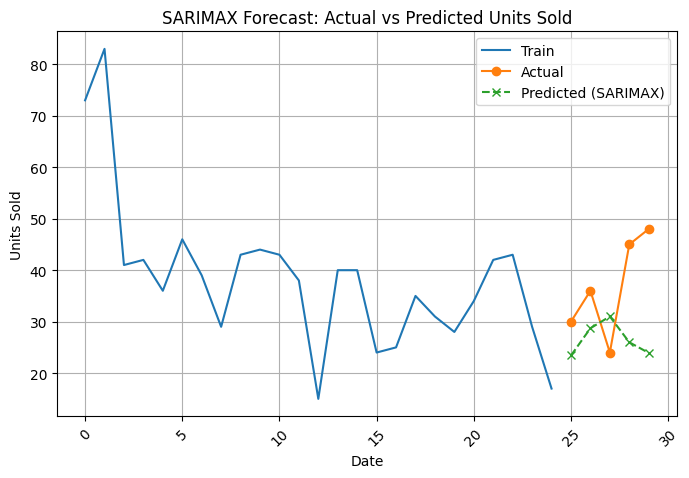

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train.index, train_y, label='Train')
plt.plot(test.index, test_y, marker='o', label='Actual')
plt.plot(test.index, forecast.values, marker='x', linestyle='--', label='Predicted (SARIMAX)')
plt.title("SARIMAX Forecast: Actual vs Predicted Units Sold")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
